## (Before using the code, read the technical note attached to this repository to see in detail the formulas and values used for this plot!)

## Required libraries for the plot

In [1]:
import numpy
import pylab
import matplotlib
import matplotlib.pyplot as plt
import cmath
import random

## Description of the generator

This is basically a code which main function if to find min values, or more specifically, give back the specific mass configuration that gives a minimum value, it works like this.

First, we need to pick the minimum value that or graph let us pick for the $m_{light}$, in this case $m_{light}=0.0001$, next, check the $\langle{m_{ee}}\rangle$ equation and extract each individual mass term in the form of ${m^{(1)}_{ee}}$, ${m^{(2)}_{ee}}$, ${m^{(3)}_{ee}}$, ${m^{(4)}_{ee}}$ (actually works for n masses, but we just keep it for 4 masses), but without including the $e^{i\phi_{ij}}$ terms, because, as is mentioned in the technical note, the critical values for 3,4,5....n neutrinos are 0 and $\pi$, but if we use those critical values on the $e^{i\phi_{ij}}$ is basically adding and subtracting each mass term, so, we can list all possible combinations of addition and subtraction of ${m^{(i)}_{ee}}$ and each combination label it with a number (Details of how this was formulated on section 11 of the technical note.)

Now that we have that mass values, since we fix an specific $m_{light}$, all the mass values we get would be also fix numbers, however, instead of just using fix numbers, the idea is the change the equation dependence to $m_{light}$, to another parameter, the frame parameter that applies only for the animation (details of the frame parameter in the technical note section 11.)

We have all the pieces now, with the mass terms in terms of the frame value and all the possible mass combinations marked with an specific label, what this code do is basically, for each specific frame value return for which mass combination that frame value give a mimimun $\langle{m_{ee}}\rangle$ value, and based on the mass combination returned for specific frame values, that would be the specific values of $\phi_{12}$, $\phi_{13}$, $\phi_{14}$ to get an inferior left boundary that contains all possible angles and keep an smooth transition.

In [2]:
#Parameters used

frame=numpy.linspace(0,100,101)

NHs12=0.307
NHs13=0.022
NHc12=1-NHs12
NHc13=1-NHs13
NHs14=0.023*(frame/100)
NHc14=1-NHs14

solarmass=0.0000753
atmmass=0.0025283
LSNDmass=1.78

#Mass terms in terms of the frame 

NHm1=0.0001
NHm2=(NHm1**2+solarmass)**(1/2)
NHm3=(NHm1**2+atmmass)**(1/2)
NHm4=(NHm1**2+LSNDmass)**(1/2)

m1=NHc12*NHc13*NHc14*NHm1
m2=NHs12*NHc13*NHc14*NHm2
m3=NHs13*NHc14*NHm3
m4=NHs14*NHm4

#Mass combinations and labels 

NHmee10=abs(m1 + m2 + m3 + m4)
NHmee11=abs(m1 + m2 + m3 - m4)
NHmee12=abs(m1 + m2 - m3 + m4)
NHmee13=abs(m1 + m2 - m3 - m4)
NHmee14=abs(m1 - m2 + m3 + m4)
NHmee15=abs(m1 - m2 + m3 - m4)
NHmee16=abs(m1 - m2 - m3 + m4)
NHmee17=abs(m1 - m2 - m3 - m4)

#Array that stores each value for each mass combination and returns the mass combination that gives the minimun value of all
#combinations (It will return a number from 0-7, that will match with the last number of each label of the mass combinations
# for example, if the code returns 5, then, the minimum value is at NHmee15)

arr=numpy.array([NHmee10, NHmee11, NHmee12, NHmee13, NHmee14, NHmee15, NHmee16, NHmee17])
tarr=arr.T
minframe=numpy.array([])
for i in range(0,101):
    minframe=numpy.append(minframe, numpy.argmin(tarr[i,:]))
print(minframe)

[4. 4. 4. 4. 4. 3. 3. 3. 3. 6. 6. 6. 6. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


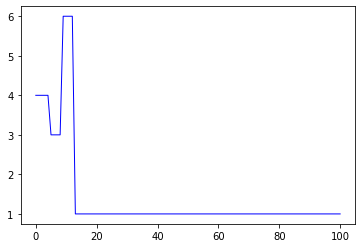

In [4]:
#This plot was just to see the behavior of how the boundaries change with respect of the frame, just a curiosity, not necessary 
#to run this part

plt.figure()
plt.plot(frame,minframe,color="blue",linestyle="-",linewidth=1, alpha=1)
plt.show()